# Import libraries

The `brisk` library is a custom-made Python library for the import, analysis and visualization of data from the BRISK project.
It comprises scripts and modules for managing data. All the main functions will be compiled in a script in order to be able to use all the functions outside the Python environment

A guide for the installation and the setup of the database, together with the list of scripts will be provided when the whole analysis is set up.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import brisk.visualization.plots_imu as imu
from brisk.utils import path
from brisk.analysis import segmentation

warnings.filterwarnings('ignore')

# List all the subjects

In the `brisk` library, a series of functions for the description of the database (number of subjects, number of trials) is provided.

In [2]:
subjects = path.get_subjects()
print(subjects)

subject = 'simone'
trials = path.get_trials(subject)
print(trials)

['giovanni', 'luca', 'micheal', 'simone']
['full', 'full_robot', 'half_robot', 'half_robot_touch']


# Visualize IMU data for one subject

Functions are provided also for the visualization of raw data (after a 5Hz LP filter)

<span style="color: red; font-weight: bold">Note</span> AP, ML and VT directions are defined during the neutral pose (arms parallel to the ground)

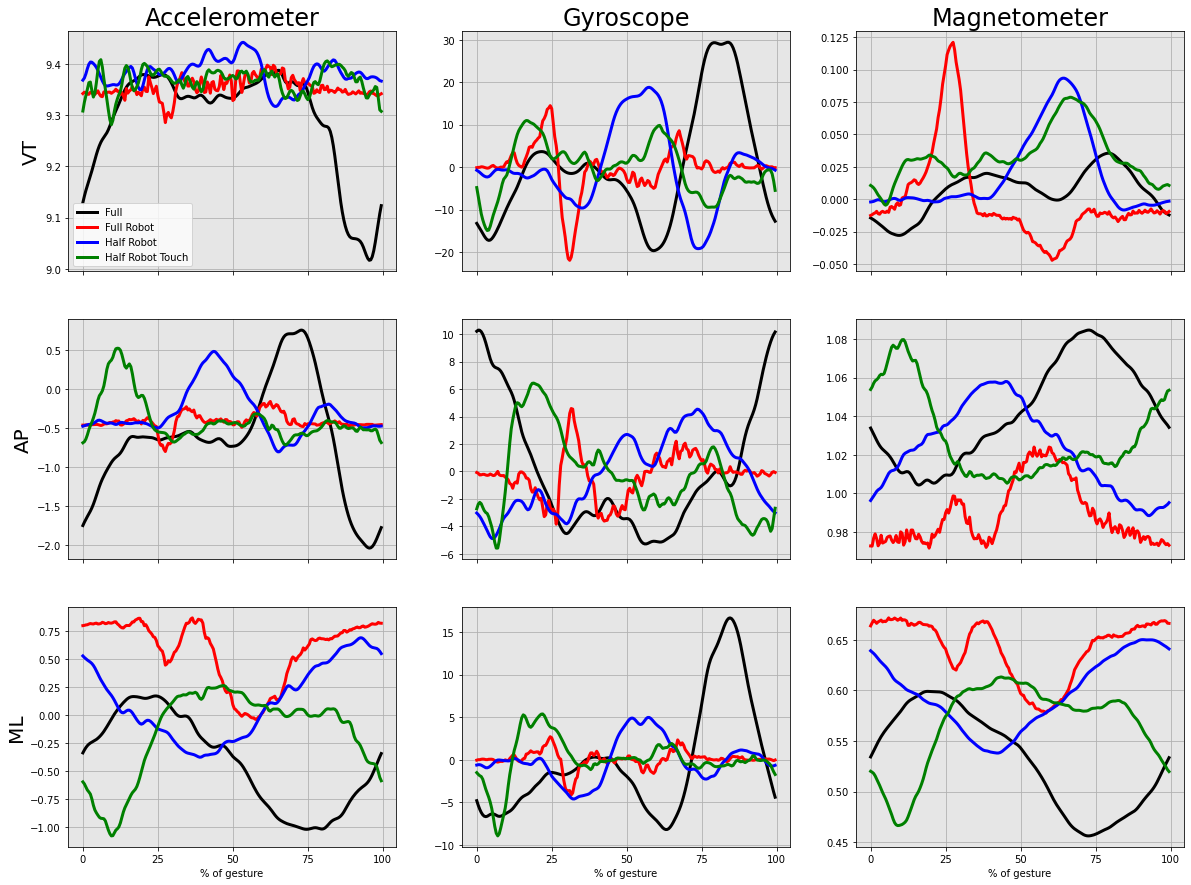

In [3]:
segment = 'trunk'
imu.plot_all_trials('giovanni', 'trunk')

# Get gesture frequency

All the quantitative analyses on the data will be hard-coded in the library, to ensure repeatability. Here, an example of the analysis of the speed of gestures, in terms of packages per minute

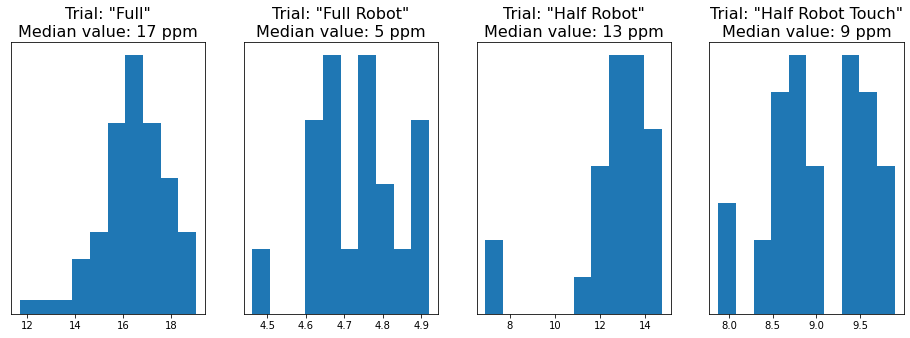

In [4]:
frequencies = segmentation.get_frequencies(subject)

fig, ax = plt.subplots(1,4,figsize=(16,5))
for i, k in enumerate(frequencies.keys()):
    ax[i].hist(frequencies[k])
    ax[i].set_title(
        f'Trial: \"{k.replace("_"," ").title()}\"\nMedian value: {np.median(frequencies[k]):.0f} ppm',
        fontsize=16
    )
    ax[i].set_yticks([])

In [7]:
from brisk.analysis import parameters

tp = parameters.get_time_parameters(subject)
for k,v in tp.items():
    print(f'Trial {k.replace("_"," ").title()}, {v["all_frequency"].size} trials after outliers removal')
    print(f'\tAverage frequency: {v["avg_frequency"]:.0f} PPM')
    print(f'\tAverage duration: {v["avg_duration"]:.2f} s')
    print(f'\tVariability of duration: {v["std_duration"]:.2f} s')
    print()

Trial Full, 68 trials after outliers removal
	Average frequency: 17 PPM
	Average duration: 3.62 s
	Variability of duration: 0.30 s

Trial Full Robot, 17 trials after outliers removal
	Average frequency: 5 PPM
	Average duration: 12.65 s
	Variability of duration: 0.38 s

Trial Half Robot, 46 trials after outliers removal
	Average frequency: 13 PPM
	Average duration: 4.57 s
	Variability of duration: 0.47 s

Trial Half Robot Touch, 35 trials after outliers removal
	Average frequency: 9 PPM
	Average duration: 6.65 s
	Variability of duration: 0.54 s

